In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    ax.grid()
    plt.ylim(-1, 50)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [19]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_BLUE'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_RED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-06_robots#24_MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_RED'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_BLUE'

In [20]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_BLUE exists


In [21]:
elpsTimeout_label = ['time', 'kID', 'areaID', 'areaColor']

In [22]:
elapsed_timeout_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    elapsed_timeout_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("elapsed_timeoutLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
            print('\tfilename: ', filename)
            
            df_elpsTimeot = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_elpsTimeot.columns = elpsTimeout_label
#             print(df_elpsTimeot['kID'].values)
            counter = Counter(df_elpsTimeot['kID'].values)
            
            for i in np.arange(num_robot):
                if i not in counter.keys():
                    print("\t",i)
                    counter[i] = 0
            elapsed_timeout_count += list(counter.values())
#             print(elapsed_timeout_count)
    
    if len(elapsed_timeout_count):
        elapsed_timeout_dict[str(timeout)+","+str(respawn)] = elapsed_timeout_count
    else:
        print(colored("\tWARNING: empty list!!", 'green'))
        elapsed_timeout_dict[str(timeout)+","+str(respawn)] = [0] * num_robot * num_run
            


Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#10_NumAreas#16_redAreas#0_1800#seconds
	timeout: 10
	respawn: 10
	filename:  seed#57_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#64_elapsed_timeoutLOG.tsv
	filename:  seed#32_elapsed_timeoutLOG.tsv
	filename:  seed#69_elapsed_timeoutLOG.tsv
	filename:  seed#29_elapsed_timeoutLOG.tsv
	filename:  seed#40_elapsed_timeoutLOG.tsv
	filename:  seed#94_elapsed_timeoutLOG.tsv
	filename:  seed#88_elapsed_timeoutLOG.tsv
	filename:  seed#49_elapsed_timeoutLOG.tsv
	filename:  seed#47_elapsed_timeoutLOG.tsv
	filename:  seed#80_elapsed_timeoutLOG.tsv
	filename:  seed#89_elapsed_timeoutLOG.tsv
	filename:  seed#81_elapsed_timeoutLOG.tsv
	filename:  seed#63_elapsed_timeoutLOG.tsv
	filename:  seed#23_elapsed_timeoutLOG.tsv
	filename:  seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#70_elapsed_timeoutLOG.tsv
	filename:  seed#35_elapsed_timeoutLOG.tsv
	fil

	filename:  seed#31_elapsed_timeoutLOG.tsv
	filename:  seed#73_elapsed_timeoutLOG.tsv
	filename:  seed#92_elapsed_timeoutLOG.tsv
	filename:  seed#52_elapsed_timeoutLOG.tsv
	filename:  seed#28_elapsed_timeoutLOG.tsv
	filename:  seed#3_elapsed_timeoutLOG.tsv
	filename:  seed#84_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#18_elapsed_timeoutLOG.tsv
	filename:  seed#9_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#60_elapsed_timeoutLOG.tsv
	filename:  seed#67_elapsed_timeoutLOG.tsv
	filename:  seed#44_elapsed_timeoutLOG.tsv
	filename:  seed#65_elapsed_timeoutLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#120_NumAreas#16_redAreas#0_1800#seconds
	timeout: 10
	respawn: 120
	filename:  seed#57_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#64_elapsed_timeoutLOG.tsv
	filename:  seed#32_elapsed_timeoutLOG.tsv
	fi

	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#31_elapsed_timeoutLOG.tsv
	filename:  seed#73_elapsed_timeoutLOG.tsv
	filename:  seed#92_elapsed_timeoutLOG.tsv
	filename:  seed#52_elapsed_timeoutLOG.tsv
	filename:  seed#28_elapsed_timeoutLOG.tsv
	filename:  seed#3_elapsed_timeoutLOG.tsv
	filename:  seed#84_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#18_elapsed_timeoutLOG.tsv
	filename:  seed#9_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#60_elapsed_timeoutLOG.tsv
	filename:  seed#67_elapsed_timeoutLOG.tsv
	filename:  seed#44_elapsed_timeoutLOG.tsv
	filename:  seed#65_elapsed_timeoutLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#2_respawn#60_NumAreas#16_redAreas#0_1800#seconds
	timeout: 20
	respawn: 60
	filename:  seed#57_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	file

	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#31_elapsed_timeoutLOG.tsv
	filename:  seed#73_elapsed_timeoutLOG.tsv
	filename:  seed#92_elapsed_timeoutLOG.tsv
	filename:  seed#52_elapsed_timeoutLOG.tsv
	filename:  seed#28_elapsed_timeoutLOG.tsv
	filename:  seed#3_elapsed_timeoutLOG.tsv
	filename:  seed#84_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#18_elapsed_timeoutLOG.tsv
	filename:  seed#9_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#60_elapsed_timeoutLOG.tsv
	filename:  seed#67_elapsed_timeoutLOG.tsv
	filename:  seed#44_elapsed_timeoutLOG.tsv
	filename:  seed#65_elapsed_timeoutLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#0_1800#seconds
	timeout: 30
	respawn: 30
	filename:  seed#57_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	file

	 20
	filename:  seed#24_elapsed_timeoutLOG.tsv
	 19
	filename:  seed#97_elapsed_timeoutLOG.tsv
	 22
	filename:  seed#45_elapsed_timeoutLOG.tsv
	filename:  seed#83_elapsed_timeoutLOG.tsv
	 16
	filename:  seed#8_elapsed_timeoutLOG.tsv
	filename:  seed#62_elapsed_timeoutLOG.tsv
	 9
	filename:  seed#72_elapsed_timeoutLOG.tsv
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#48_elapsed_timeoutLOG.tsv
	 3
	filename:  seed#74_elapsed_timeoutLOG.tsv
	 14
	filename:  seed#46_elapsed_timeoutLOG.tsv
	 21
	filename:  seed#37_elapsed_timeoutLOG.tsv
	 13
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#31_elapsed_timeoutLOG.tsv
	 23
	filename:  seed#73_elapsed_timeoutLOG.tsv
	 0
	 20
	filename:  seed#92_elapsed_timeoutLOG.tsv
	 10
	filename:  seed#52_elapsed_timeoutLOG.tsv
	 3
	 16
	filename:  seed#28_elapsed_timeoutLOG.tsv
	filename:  seed#3_elapsed_timeoutLOG.tsv
	filename:  seed#84_elapsed_timeoutLOG.tsv
	 19
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#18_ela

	filename:  seed#59_elapsed_timeoutLOG.tsv
	 4
	 6
	 7
	 10
	filename:  seed#6_elapsed_timeoutLOG.tsv
	 1
	 4
	 6
	 17
	filename:  seed#42_elapsed_timeoutLOG.tsv
	 10
	 15
	filename:  seed#82_elapsed_timeoutLOG.tsv
	 5
	 13
	 14
	 17
	filename:  seed#99_elapsed_timeoutLOG.tsv
	 6
	 11
	 20
	filename:  seed#66_elapsed_timeoutLOG.tsv
	 0
	 8
	 15
	 19
	filename:  seed#86_elapsed_timeoutLOG.tsv
	 4
	filename:  seed#43_elapsed_timeoutLOG.tsv
	 4
	filename:  seed#71_elapsed_timeoutLOG.tsv
	 1
	 2
	 17
	 18
	filename:  seed#75_elapsed_timeoutLOG.tsv
	 7
	 18
	 19
	 22
	filename:  seed#61_elapsed_timeoutLOG.tsv
	 8
	 12
	filename:  seed#53_elapsed_timeoutLOG.tsv
	 4
	 23
	filename:  seed#56_elapsed_timeoutLOG.tsv
	 3
	 10
	filename:  seed#27_elapsed_timeoutLOG.tsv
	 2
	 11
	 13
	 16
	 20
	filename:  seed#25_elapsed_timeoutLOG.tsv
	 3
	 19
	filename:  seed#54_elapsed_timeoutLOG.tsv
	 11
	 18
	filename:  seed#5_elapsed_timeoutLOG.tsv
	 13
	 19
	filename:  seed#15_elapsed_timeoutLOG.tsv
	 2
	 12

	 4
	 15
	 20
	 23
	filename:  seed#48_elapsed_timeoutLOG.tsv
	 1
	 3
	 4
	 9
	 11
	 15
	 16
	 18
	 19
	 20
	 23
	filename:  seed#74_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 4
	 5
	 10
	 19
	 22
	filename:  seed#46_elapsed_timeoutLOG.tsv
	 2
	 4
	 6
	 13
	 15
	 19
	filename:  seed#37_elapsed_timeoutLOG.tsv
	 2
	 4
	 5
	 10
	 14
	filename:  seed#39_elapsed_timeoutLOG.tsv
	 1
	 3
	 4
	 7
	 9
	 21
	 23
	filename:  seed#31_elapsed_timeoutLOG.tsv
	 0
	 3
	 6
	 14
	 17
	 20
	 22
	 23
	filename:  seed#73_elapsed_timeoutLOG.tsv
	 0
	 3
	 7
	 8
	 9
	 16
	 19
	 20
	filename:  seed#92_elapsed_timeoutLOG.tsv
	 5
	 9
	 11
	 13
	 16
	 19
	filename:  seed#52_elapsed_timeoutLOG.tsv
	 0
	 2
	 9
	 16
	 19
	 22
	 23
	filename:  seed#28_elapsed_timeoutLOG.tsv
	 4
	 5
	 14
	 17
	 19
	 21
	filename:  seed#3_elapsed_timeoutLOG.tsv
	 1
	 6
	 8
	 9
	 11
	 13
	 15
	 22
	filename:  seed#84_elapsed_timeoutLOG.tsv
	 1
	 2
	 8
	 10
	 15
	 17
	 23
	filename:  seed#93_elapsed_timeoutLOG.tsv
	 1
	 3
	 8
	 11
	 13
	 16
	 1

	filename:  seed#24_elapsed_timeoutLOG.tsv
	 4
	 5
	 6
	 8
	 10
	 11
	 14
	 15
	 17
	 18
	 19
	 20
	 21
	 23
	filename:  seed#97_elapsed_timeoutLOG.tsv
	 0
	 2
	 4
	 5
	 7
	 10
	 11
	 12
	 13
	 15
	 16
	 18
	 23
	filename:  seed#45_elapsed_timeoutLOG.tsv
	 5
	 6
	 7
	 9
	 10
	 12
	 15
	 20
	 21
	filename:  seed#83_elapsed_timeoutLOG.tsv
	 2
	 4
	 5
	 6
	 11
	 12
	 13
	 15
	 16
	 17
	 19
	 20
	 21
	 22
	filename:  seed#8_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 6
	 8
	 9
	 10
	 12
	 13
	 14
	 16
	 17
	 19
	 21
	 23
	filename:  seed#62_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 8
	 13
	 14
	 17
	 19
	 21
	 22
	filename:  seed#72_elapsed_timeoutLOG.tsv
	 0
	 7
	 9
	 10
	 11
	 15
	 17
	 21
	 22
	filename:  seed#58_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 6
	 7
	 10
	 11
	 14
	 16
	 18
	 19
	 21
	 22
	 23
	filename:  seed#48_elapsed_timeoutLOG.tsv
	 0
	 2
	 4
	 6
	 8
	 9
	 12
	 13
	 15
	 17
	 18
	 19
	 21
	 22
	 23
	filename:  seed#74_elapsed_timeoutLOG.tsv
	 1
	 4
	 5
	 7
	 10
	 13
	 14


	 4
	 5
	 6
	 7
	 9
	 10
	 15
	 16
	 17
	 19
	 22
	 23
	filename:  seed#42_elapsed_timeoutLOG.tsv
	 1
	 2
	 4
	 6
	 8
	 9
	 10
	 12
	 13
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	filename:  seed#82_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 6
	 7
	 8
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 20
	 21
	 23
	filename:  seed#99_elapsed_timeoutLOG.tsv
	 0
	 3
	 4
	 5
	 6
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	filename:  seed#66_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 8
	 10
	 11
	 13
	 15
	 16
	 18
	 19
	 20
	 22
	 23
	filename:  seed#86_elapsed_timeoutLOG.tsv
	 2
	 3
	 4
	 5
	 7
	 9
	 10
	 12
	 13
	 14
	 16
	 17
	 18
	 20
	 21
	 23
	filename:  seed#43_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 4
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 22
	 23
	filename:  seed#71_elapsed_timeoutLOG.tsv
	 0
	 2
	 5
	 7
	 10
	 11
	 12
	 13
	 22
	 23
	filename:  seed#75_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 5
	 6
	 11
	 12
	 13
	 14
	 17
	 18
	 19
	 20
	 22
	 23
	fi

	filename:  seed#19_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 22
	 23
	filename:  seed#50_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#98_elapsed_timeoutLOG.tsv
	 0
	 2
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#20_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 5
	 7
	 9
	 10
	 15
	 16
	 17
	 19
	 21
	 22
	 23
	filename:  seed#22_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 10
	 12
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#77_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 5
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 19
	 20
	 21
	 22
	 23
	filename:  seed#76_elapsed_timeoutLOG.tsv
	 0
	 3
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 12
	 14
	 16
	 17
	 18
	 19
	 20
	 21
	filename:  seed#96_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 

	filename:  seed#64_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 5
	 6
	 8
	 9
	 11
	 13
	 15
	 16
	 17
	 19
	 22
	 23
	filename:  seed#32_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 18
	 19
	 20
	 21
	 23
	filename:  seed#69_elapsed_timeoutLOG.tsv
	 2
	 4
	 5
	 6
	 7
	 8
	 9
	 11
	 12
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	filename:  seed#29_elapsed_timeoutLOG.tsv
	 0
	 3
	 4
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 15
	 16
	 17
	 19
	 21
	 23
	filename:  seed#40_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 6
	 7
	 8
	 9
	 10
	 12
	 13
	 16
	 17
	 19
	 20
	 23
	filename:  seed#94_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 5
	 6
	 7
	 8
	 10
	 11
	 12
	 14
	 16
	 17
	 20
	 21
	 22
	 23
	filename:  seed#88_elapsed_timeoutLOG.tsv
	 0
	 2
	 7
	 8
	 10
	 11
	 13
	 15
	 17
	 18
	 19
	 21
	 22
	filename:  seed#49_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 11
	 12
	 13
	 14
	 17
	 18
	 19
	 21
	 22
	 23
	filename:  seed#47_elapsed_timeoutLOG.tsv
	 1
	 2
	 4
	 5
	 6
	 7
	 8
	 10


	filename:  seed#73_elapsed_timeoutLOG.tsv
	 0
	 3
	 5
	 7
	 8
	 11
	 13
	 14
	 15
	 17
	 18
	 21
	 22
	filename:  seed#92_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 10
	 11
	 13
	 14
	 15
	 18
	 21
	 22
	filename:  seed#52_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 10
	 13
	 16
	 17
	 19
	 20
	 21
	 23
	filename:  seed#28_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 19
	 20
	 21
	 22
	 23
	filename:  seed#3_elapsed_timeoutLOG.tsv
	 1
	 3
	 4
	 8
	 10
	 11
	 12
	 13
	 14
	 16
	 20
	 21
	 23
	filename:  seed#84_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 6
	 7
	 8
	 10
	 11
	 15
	 16
	 17
	 18
	 20
	 23
	filename:  seed#93_elapsed_timeoutLOG.tsv
	 1
	 3
	 4
	 6
	 7
	 8
	 10
	 14
	 15
	 16
	 18
	 19
	 21
	 23
	filename:  seed#18_elapsed_timeoutLOG.tsv
	 0
	 2
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 14
	 16
	 17
	 19
	 20
	 21
	 22
	 23
	filename:  seed#9_elapsed_timeoutLOG.tsv
	 0
	 1
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 16

	 22
	 23
	filename:  seed#66_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#86_elapsed_timeoutLOG.tsv
	 1
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	filename:  seed#43_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	filename:  seed#71_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	filename:  seed#75_elapsed_timeoutLOG.tsv
	 0
	 1
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#61_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 18
	 20
	 22
	 23
	filename:  seed#53_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 23
	filename:  seed#56_

	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#2_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	filename:  seed#19_elapsed_timeoutLOG.tsv
	 0
	 1
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 21
	 22
	 23
	filename:  seed#50_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#98_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#20_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 9
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#22_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 17
	 18
	 19
	 20
	 22
	 23
	filename:  seed#77_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 9

	WARNING, empty file at:seed#63_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#23_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#70_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	WARNING, empty file at:seed#35_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#100_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#30_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#21_elapsed_timeoutLOG.tsv
	filename:  seed#38_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 23
	WARNING, empty file at:seed#68_elapsed_timeoutLOG.tsv
	filename:  seed#87_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	filename:  seed#90_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17


	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 23
	filename:  seed#47_elapsed_timeoutLOG.tsv
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 14
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#80_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	filename:  seed#89_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#81_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	filename:  seed#63_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 17
	 18
	 19
	 20
	 21
	 22
	filename:  seed#23_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 4
	 5
	 6
	 7
	 8
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 22
	 23
	filename:  seed#7_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5


	filename:  seed#37_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 5
	 7
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 18
	 20
	 21
	 22
	 23
	filename:  seed#39_elapsed_timeoutLOG.tsv
	 0
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 23
	filename:  seed#31_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	filename:  seed#73_elapsed_timeoutLOG.tsv
	 1
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#92_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 5
	 6
	 7
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 19
	 20
	 21
	 22
	 23
	filename:  seed#52_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 6
	 8
	 12
	 15
	 16
	 17
	 18
	 20
	 21
	filename:  seed#28_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 4
	 5
	 7
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 18
	 19
	 22
	 23
	filename:  seed#3_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 

	 7
	 9
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#45_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#83_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 18
	 19
	 20
	 21
	 22
	 23
	filename:  seed#8_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 17
	 18
	 19
	 20
	 21
	 23
	filename:  seed#62_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	filename:  seed#72_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 8
	 9
	 10
	 11
	 12
	 14
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	WARNING, empty file at:seed#58_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#48_elapsed_timeoutLOG.tsv
	filename:  seed#74_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 

	WARNING, empty file at:seed#60_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#67_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#44_elapsed_timeoutLOG.tsv
	filename:  seed#65_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#24_respawn#120_NumAreas#16_redAreas#0_1800#seconds
	timeout: 240
	respawn: 120
	WARNING, empty file at:seed#57_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#85_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#64_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	WARNING, empty file at:seed#32_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#69_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#29_elapsed_timeoutLOG.tsv
	WARNING, empty file at:seed#40_elapsed_timeoutLOG.tsv
	WARNING, em

In [23]:
elapsed_timeout_dict.keys()

dict_keys(['10,10', '10,30', '10,60', '10,120', '20,10', '20,30', '20,60', '20,120', '30,10', '30,30', '30,60', '30,120', '60,10', '60,30', '60,60', '60,120', '120,10', '120,30', '120,60', '120,120', '180,10', '180,30', '180,60', '180,120', '240,10', '240,30', '240,60', '240,120'])

In [24]:
print(len(elapsed_timeout_dict['10,60']))

2400


### RED

elapsed_timeout_TimeoutRespawnExp_2021-07-07_robots#24_RED


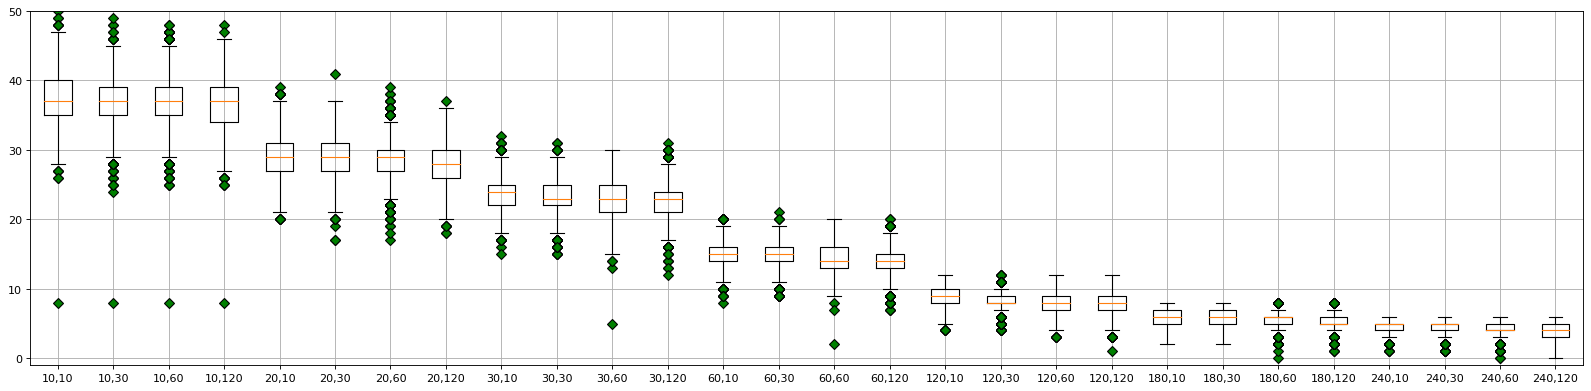

In [18]:
saveFigure = True
figName="elapsed_timeout_"+results_folder.split("/")[-1]
print(figName)
simple_boxplot(elapsed_timeout_dict, figName, saveFigure)

### MIXED

elapsed_timeout_TimeoutRespawnExp_2021-07-06_robots#24_MIXED


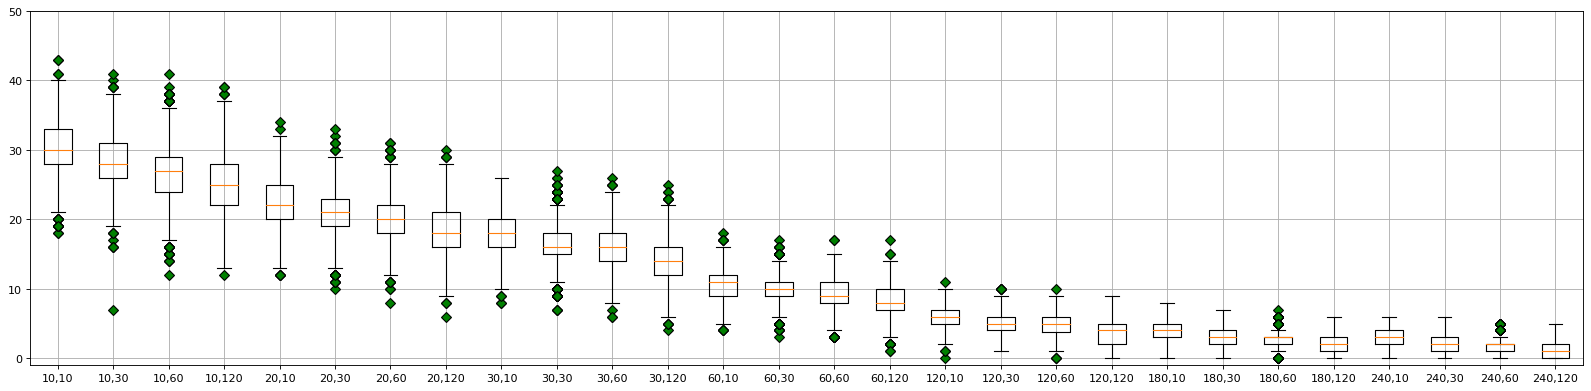

In [11]:
saveFigure = True
figName="elapsed_timeout_"+results_folder.split("/")[-1]
print(figName)
simple_boxplot(elapsed_timeout_dict, figName, saveFigure)

### Blue

elapsed_timeout_TimeoutRespawnExp_2021-07-07_robots#24_BLUE


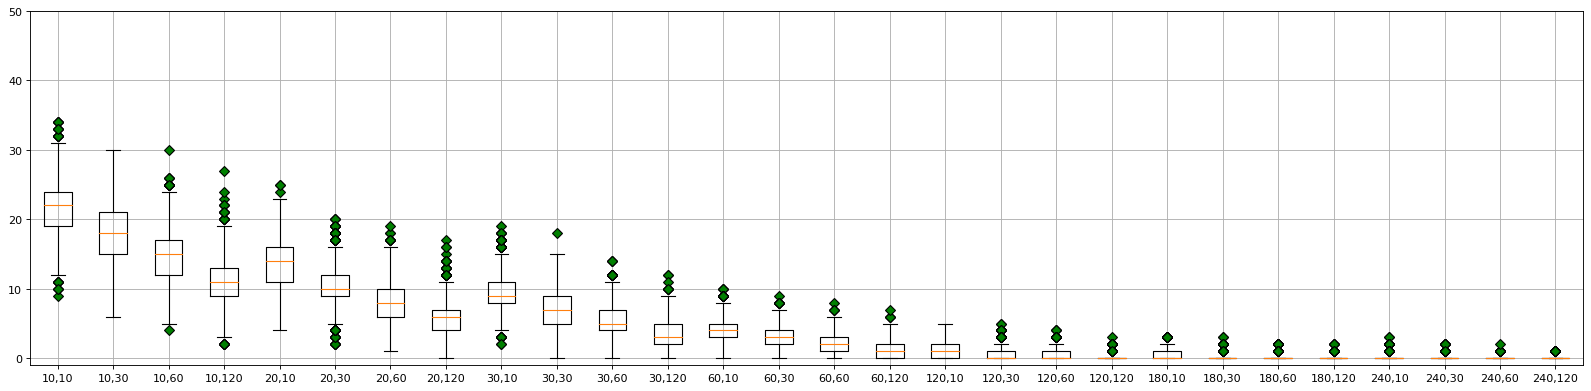

In [25]:
saveFigure = True
figName="elapsed_timeout_"+results_folder.split("/")[-1]
print(figName)
simple_boxplot(elapsed_timeout_dict, figName, saveFigure)